In [ ]:

 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="cdf9b9daff6e97da8251bab4881ad0e7225af65946ca3f7e127fa3e4709ff8f15e34a8d45aba9936e77fa455b9d426546c6b62dda33b95b996237eb100b43aee", name = "xuy", set_as_default=True)
 

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Load saved credentials
service = QiskitRuntimeService()

In [1]:
from qiskit_aer import Aer
 
from qiskit import *
from qiskit.visualization import plot_histogram

In [4]:
#Example Circuit to check the environment setup
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeCairoV2
 

In [ ]:
# Create empty circuit
# example_circuit = QuantumCircuit(2)
# example_circuit.measure_all()

In [8]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

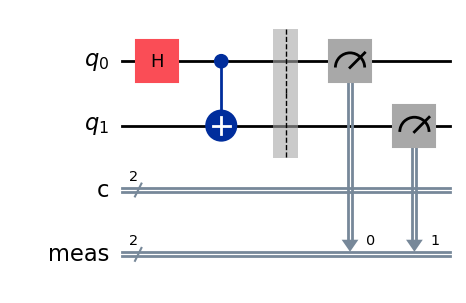

In [9]:

bell.draw(output='mpl')

In [44]:

n_qubits = 2
observable = SparsePauliOp("Z" * n_qubits)
bell.measure_all()

In [45]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
bell_circuit = pm.run(bell)
bell_observable = observable.apply_layout(bell_circuit.layout)

In [47]:
service = QiskitRuntimeService(name="xuy")
backend = service.backend("ibmq_qasm_simulator")
estimator = Estimator(backend)

job_est = estimator.run([(bell_circuit, bell_observable)])
result_est = job_est.result()

RequestsApiError: 'HTTPSConnectionPool(host=\'auth.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/version (Caused by ReadTimeoutError("HTTPSConnectionPool(host=\'auth.quantum-computing.ibm.com\', port=443): Read timed out. (read timeout=5.0)"))'

In [18]:
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
# service = QiskitRuntimeService()
# backend = service.backend("ibmq_qasm_simulator")
# backend = FakeCairoV2()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService(name="xuy")
backend = service.backend("ibmq_qasm_simulator")
sampler = Sampler(backend)
job = sampler.run([bell])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)


job id: cog3s0vtcirtooet3kog
PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>), meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [41]:
for idx, pub_result in enumerate(result):
    print(f" > Counts for pub {idx}: {pub_result.data.meas.get_counts()}")

 > Counts for pub 0: {'10': 125, '11': 369, '00': 491, '01': 39}


Measurement Counts:
{'10': 125, '11': 369, '00': 491, '01': 39}


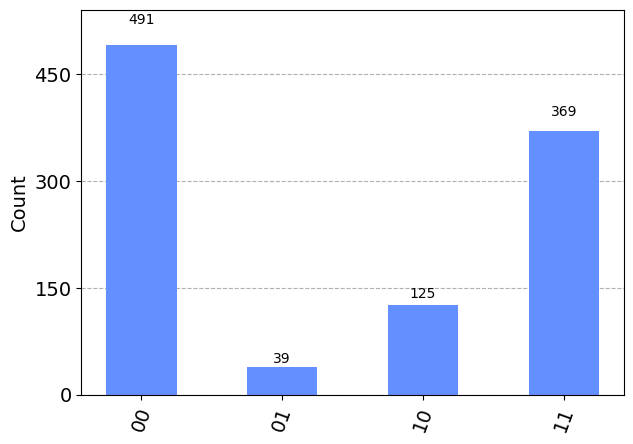

In [43]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram

pub_result = result[0]  # Get the PubResult object
counts = pub_result.data.meas.get_counts()  # Get the counts dictionary

# Print the measurement counts
print("Measurement Counts:")
print(counts)

# Visualize the measurement counts on the Bloch sphere
# plot_bloch_multivector(counts)

# Visualize the measurement counts as a histogram
plot_histogram(counts)

In [ ]:
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: b038f000-df1b-48cb-ac0e-2794eb834705
PrimitiveResult([PubResult(data=DataBin<>(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)))], metadata={})


In [32]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Get the PubResult object from the PrimitiveResult
pub_result = result[0]

# Extract the counts from the PubResult
counts = pub_result.get_counts()

# Visualize the counts on the Bloch sphere
plot_bloch_multivector(counts)

# Visualize the counts as a histogram
plot_histogram(counts)

AttributeError: 'PubResult' object has no attribute 'get_counts'

In [17]:
print(result)

PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>), meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [36]:
print(result)

PrimitiveResult([PubResult(data=DataBin<>(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)))], metadata={})


In [39]:
counts  = result.meas(circ)
print(counts)

AttributeError: 'PrimitiveResult' object has no attribute 'meas'